# TASK 2: CLUSTERING (test #2)

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.neighbors import NearestNeighbors

#### Loading the dataset

Read the .csv file containing the data. The first line contains the list of attributes. The data is assigned to a Pandas dataframe.

In [3]:
df = pd.read_csv(r"csv/seismic_clust.csv", skipinitialspace=True)

In [4]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,...,log_genergy,log_gpuls,log_gdenergy,log_gdpuls,log_energy,genergy_S,gpuls_S,gdenergy_S,gdpuls_S,energy_S
0,0.0,0.0,0,15180,48,-72,-72,0.0,0,0,...,9.627734,3.871201,3.218876,3.218876,0.000000,-0.344249,-1.651209,-1.593212,-1.761844,0.000000
1,0.0,0.0,0,14720,33,-70,-79,0.0,1,0,...,9.596962,3.496508,3.295837,2.890372,7.601402,-0.364671,-1.950436,-1.498307,-2.209817,0.963185
2,0.0,0.0,0,8050,30,-81,-78,0.0,0,0,...,8.993427,3.401197,2.772589,2.944439,0.000000,-0.765223,-2.026550,-2.143552,-2.136087,0.000000
3,0.0,0.0,0,28820,171,-23,40,0.0,1,0,...,10.268825,5.141664,4.304065,4.919981,8.006701,0.081228,-0.636629,-0.255009,0.557908,1.014541
4,0.0,0.0,0,12640,57,-63,-52,0.0,0,0,...,9.444622,4.043051,3.526361,3.806662,0.000000,-0.465776,-1.513971,-1.214037,-0.960295,0.000000


In [5]:
df.shape

(2578, 25)

## Clustering

### (genergy, gdpuls, gpuls, gdenergy)

In [6]:
# Selezione attributi da utilizzare nel clustering

df_1 = pd.DataFrame(data = df, columns=['genergy_S', 'gpuls_S', 'gdenergy_S', 'gdpuls_S'])
df_1.head()

,genergy_S,gpuls_S,gdenergy_S,gdpuls_S
0,-0.344249,-1.651209,-1.593212,-1.761844
1,-0.364671,-1.950436,-1.498307,-2.209817
2,-0.765223,-2.026550,-2.143552,-2.136087
3,0.081228,-0.636629,-0.255009,0.557908
4,-0.465776,-1.513971,-1.214037,-0.960295


In [7]:
# calcolo di SSE e Silhouette tra 2 e 51

sse_list = []
silhouette_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_1)
    sse_list.append( kmeans.inertia_ )
    silhouette_list.append(silhouette_score(df_1, kmeans.labels_))

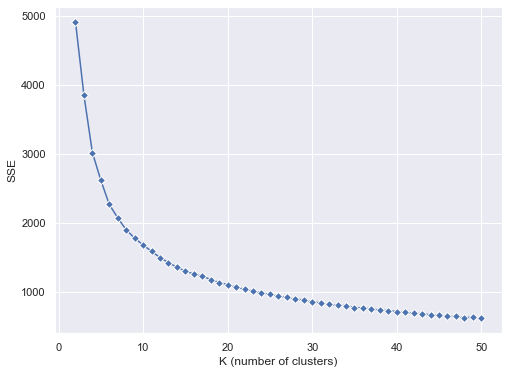

In [8]:
# visualizzazione grafica SSE

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(sse_list)+2), sse_list, marker='D', mec='white')
plt.xlabel('K (number of clusters)')
plt.ylabel('SSE')
plt.show()

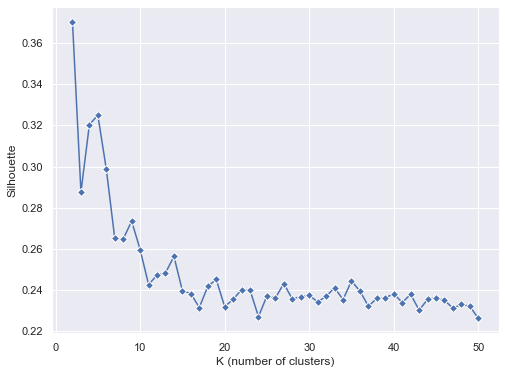

In [9]:
# visualizzazione grafica Silhouette

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(2, len(sse_list)+2), silhouette_list, marker='D', mec='white')
plt.xlabel('K (number of clusters)')
plt.ylabel('Silhouette')
plt.show()

In [10]:
# inizializzazione k-means (con metodo k-means++)

kmeans = KMeans( n_clusters=4, n_init=10, max_iter=100, init="k-means++")
kmeans.fit(df_1)

KMeans(max_iter=100, n_clusters=4)

In [11]:
# stampa dell'array con le assegnazioni record-cluster

kmeans.labels_

array([2, 2, 2, ..., 3, 1, 1])

In [12]:
# generazione lista centroidi

centers = kmeans.cluster_centers_
centers

array([[ 1.7825673 ,  1.01135825,  0.00599375,  0.04248046],
       [-0.2366661 , -0.33863054, -0.35479392, -0.32394153],
       [-1.13858378, -1.7469308 , -1.13262718, -1.45612966],
       [ 0.22526645,  0.31784025,  0.72230352,  0.66150203]])

In [13]:
# creazione copia dataframe per visualizzare il pairplot

df_1Sc = df_1.copy(deep=True)
df_1Sc['kmeans.labels_'] = kmeans.labels_

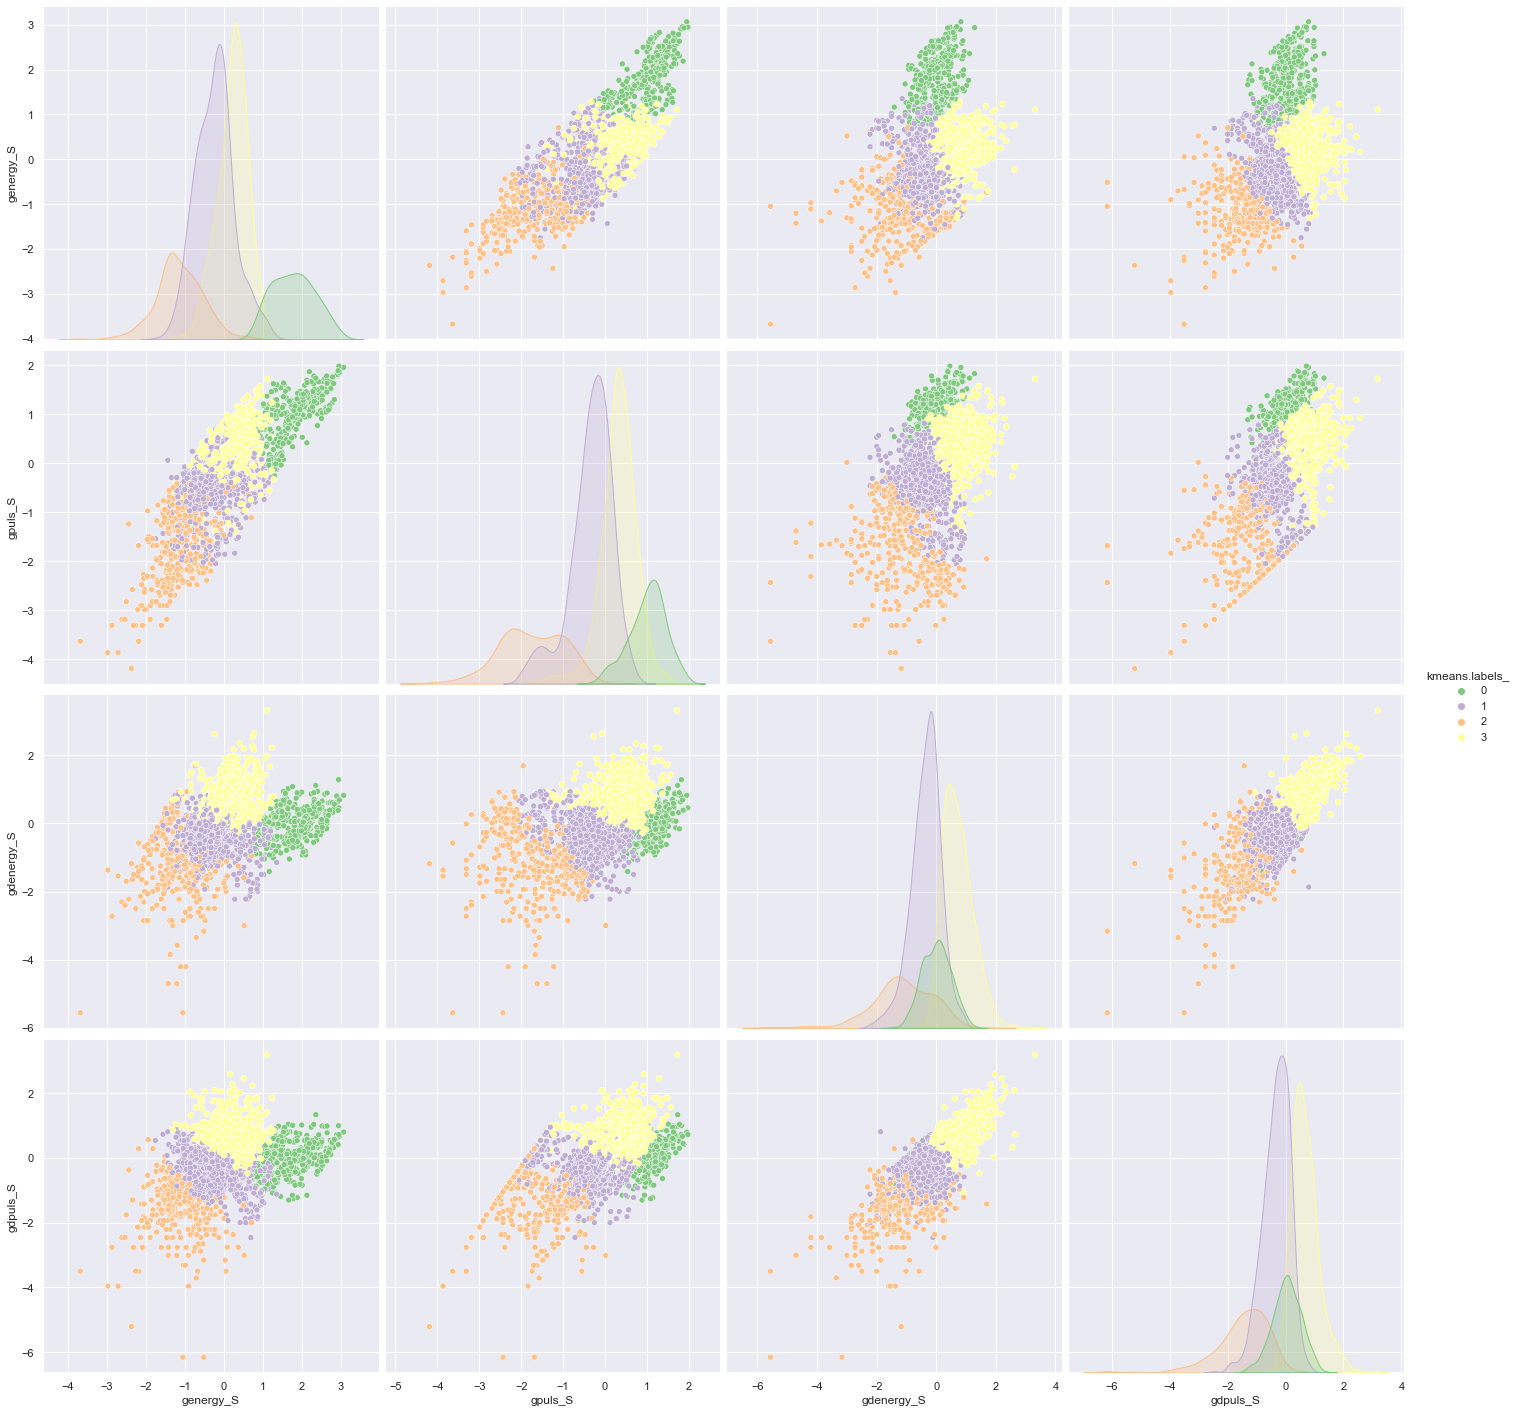

In [14]:
# visualizzazione pairplot con le possibili combinazioni tra attributi

sns.pairplot(df_1Sc, hue='kmeans.labels_', palette = "Accent", height=5)
plt.show()

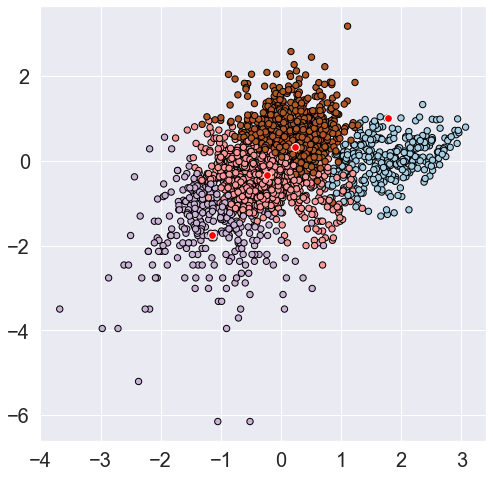

In [17]:
# visualizzazione grafica clustering scelto

plt.figure(figsize=(8, 8))
plt.scatter( df_1['genergy_S'], df_1['gdpuls_S'], s=40, edgecolor='black', c= kmeans.labels_, cmap = 'Paired')
plt.scatter( centers[:,0], centers[:,1], c='red', marker='.', s=240, edgecolor='white')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

C:\Users\crocc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


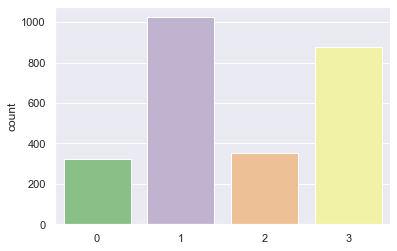

In [18]:
# visualizzazione count plot per ogni cluster

sns.countplot(kmeans.labels_, palette = 'Accent')
plt.show()

In [19]:
# conteggio valori per ogni cluster

np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([ 325, 1024,  354,  875], dtype=int64))

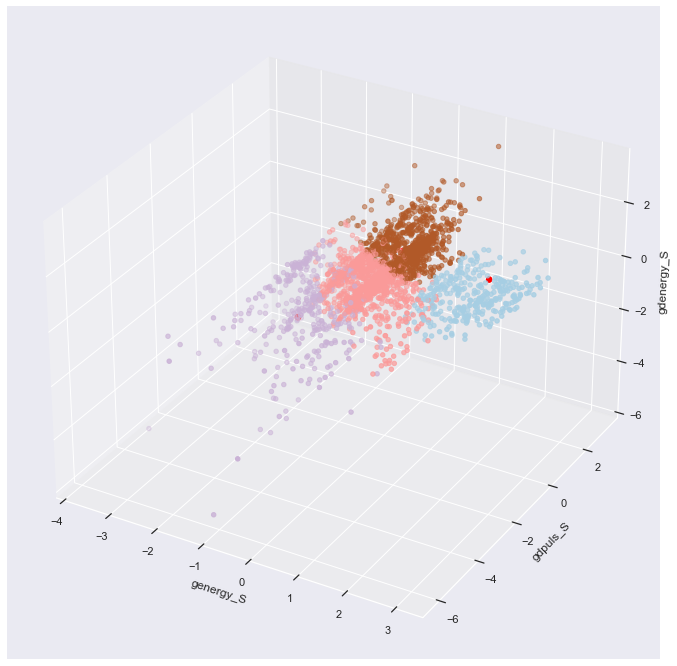

In [20]:
# visualizzazione grafica 3D clustering scelto

fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = 'gdenergy_S'

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=kmeans.labels_, marker='o', cmap = 'Paired')
ax.scatter( centers[:,0], centers[:,1], centers[:,2], c='red', marker='.', s=240, edgecolor='white' )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

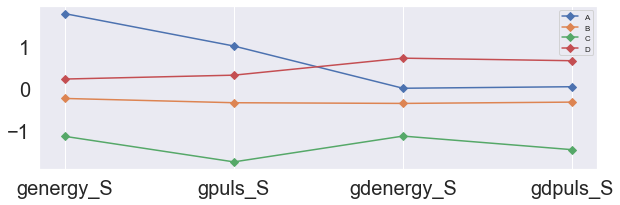

In [22]:
#CAMBIARE COLORI

plt.figure(figsize=(10, 3))

clust_name = ['A', 'B', 'C', 'D']
for i in range(len(centers)):
    plt.plot(centers[i], marker='D', label=clust_name[i])

plt.xticks([0, 1, 2, 3], df_1, fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=8, loc='best')
plt.grid(axis='y')

In [23]:
# creazione copia dataframe per visualizzare correlazione con attributo class

df_1C = df_1.copy(deep=True)
df_1C['class'] = df['class']

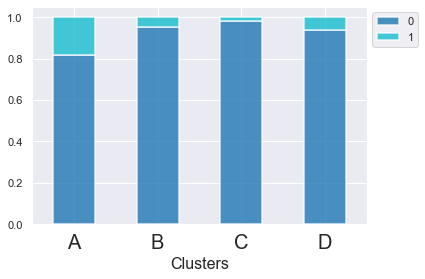

In [24]:
# visualizzazione grafica correlazione elementi clusters con attributo class

df_1C['kmeans_labels'] = kmeans.labels_

bar_pl = df_1C['class'].groupby(df_1C['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5, colormap='tab10')

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.xlabel('Clusters', fontsize=16)
#plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [25]:
# valori numerici SSE e Silhouette

print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(df_1, kmeans.labels_))

SSE 3022.2708809183805
Silhouette 0.3203934252459889


## DBScan (boh)

#### minsample (D * 2)

In [147]:
# calcolo distanza dbscan con k = 8

dist = pdist(df_1, 'euclidean')
dist = squareform(dist)

k=8
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

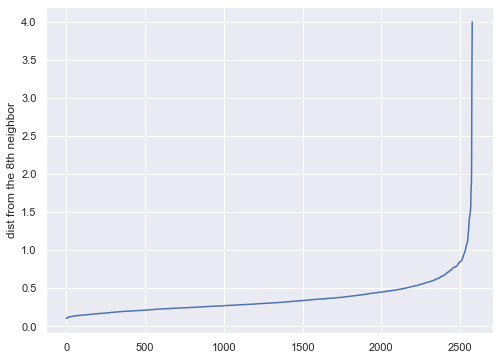

In [148]:
# visualizzazione grafica distanze

plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from the '+ str(k) + 'th neighbor')

plt.show()

In [186]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(4, 32, 2)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
MIN_SAMPLES: [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


In [187]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [188]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [189]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df_1, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   4 | 0.269   16
  2 | Tested with eps = 0.1 and min_samples =   6 | 0.262    8
  3 | Tested with eps = 0.1 and min_samples =   8 | 0.258    0
  4 | Tested with eps = 0.1 and min_samples =  10 | 0.258    0
  5 | Tested with eps = 0.1 and min_samples =  12 | 0.258    0
  6 | Tested with eps = 0.1 and min_samples =  14 | 0.258    0
  7 | Tested with eps = 0.1 and min_samples =  16 | 0.258    0
  8 | Tested with eps = 0.1 and min_samples =  18 | 0.258    0
  9 | Tested with eps = 0.1 and min_samples =  20 | 0.258    0
 10 | Tested with eps = 0.1 and min_samples =  22 | 0.258    0
 11 | Tested with eps = 0.1 and min_samples =  24 | 0.258    0
 12 | Tested with eps = 0.1 and min_samples =  26 | 0.258    0
 13 | Tested with eps = 0.1 and min_samples =  28 | 0.258    0
 14 | Tested with eps = 0.1 and min_samples =  30

129 | Tested with eps = 1.0 and min_samples =   8 | 1.509    1
130 | Tested with eps = 1.0 and min_samples =  10 | 1.424    1
131 | Tested with eps = 1.0 and min_samples =  12 |  1.41    1
132 | Tested with eps = 1.0 and min_samples =  14 | 1.337    1
133 | Tested with eps = 1.0 and min_samples =  16 |  1.26    1
134 | Tested with eps = 1.0 and min_samples =  18 |  1.24    1
135 | Tested with eps = 1.0 and min_samples =  20 | 1.138    1
136 | Tested with eps = 1.0 and min_samples =  22 | 1.051    1
137 | Tested with eps = 1.0 and min_samples =  24 | 1.049    1
138 | Tested with eps = 1.0 and min_samples =  26 | 1.018    1
139 | Tested with eps = 1.0 and min_samples =  28 | 0.985    1
140 | Tested with eps = 1.0 and min_samples =  30 | 0.977    1
141 | Tested with eps = 1.1 and min_samples =   4 | 1.985    1
142 | Tested with eps = 1.1 and min_samples =   6 | 1.887    1
143 | Tested with eps = 1.1 and min_samples =   8 | 1.887    1
144 | Tested with eps = 1.1 and min_samples =  10 | 1.5

261 | Tested with eps = 1.9 and min_samples =  20 | 2.819    1
262 | Tested with eps = 1.9 and min_samples =  22 | 2.819    1
263 | Tested with eps = 1.9 and min_samples =  24 | 2.819    1
264 | Tested with eps = 1.9 and min_samples =  26 | 2.819    1
265 | Tested with eps = 1.9 and min_samples =  28 | 2.819    1
266 | Tested with eps = 1.9 and min_samples =  30 | 2.819    1


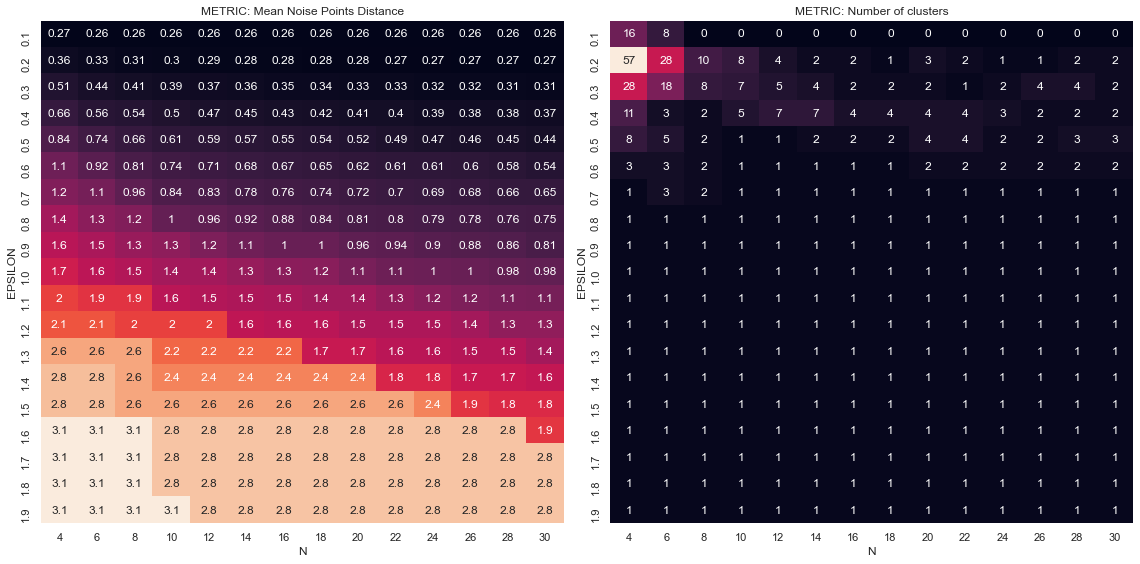

In [190]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()


In [205]:
# inizializzazione dbscan

dbscan = DBSCAN( eps=0.8, min_samples=50)
dbscan.fit(df_1)

DBSCAN(eps=0.8, min_samples=50)

In [206]:
# stampa dell'array con le assegnazioni record-cluster

dbscan.labels_

array([ 0, -1, -1, ...,  0,  0,  0], dtype=int64)

In [207]:
# stampa lista cluster e lista elementi di ogni cluster

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([ 178, 2400], dtype=int64))

In [140]:
# creazione copia dataframe per visualizzare il pairplot

df_1Sc['dbscan.labels_'] = dbscan.labels_

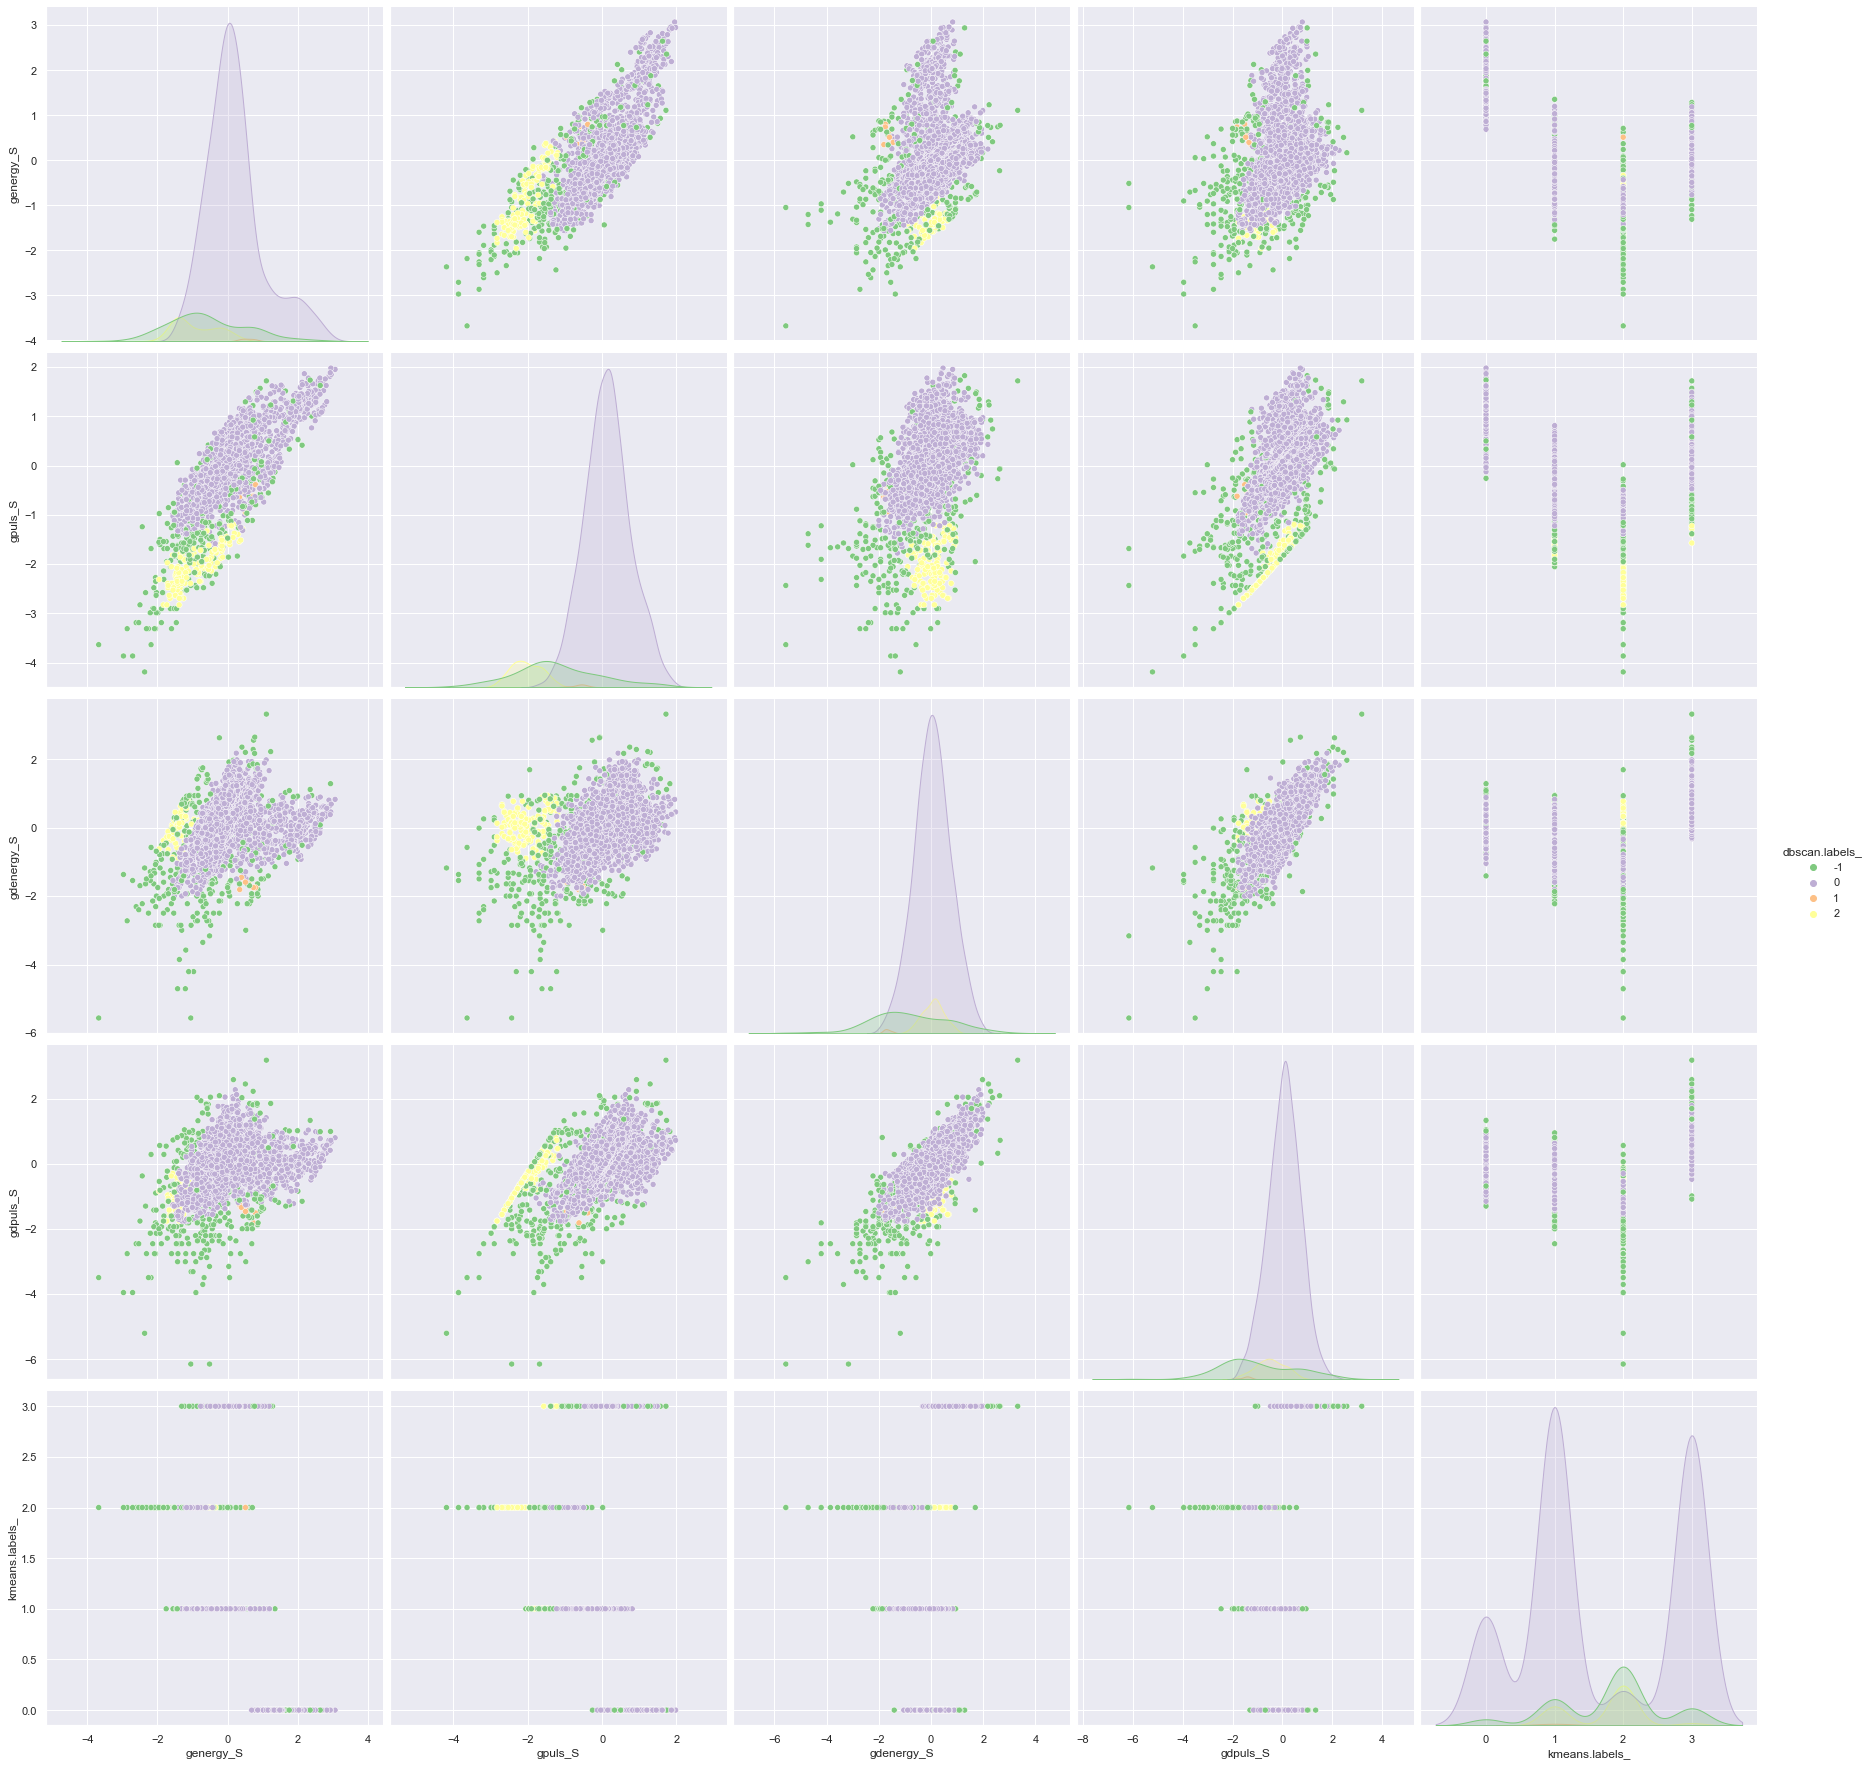

In [141]:
# visualizzazione pairplot con le possibili combinazioni tra attributi

sns.pairplot(df_1Sc, hue='dbscan.labels_', palette = "Accent", height=5)
plt.show()

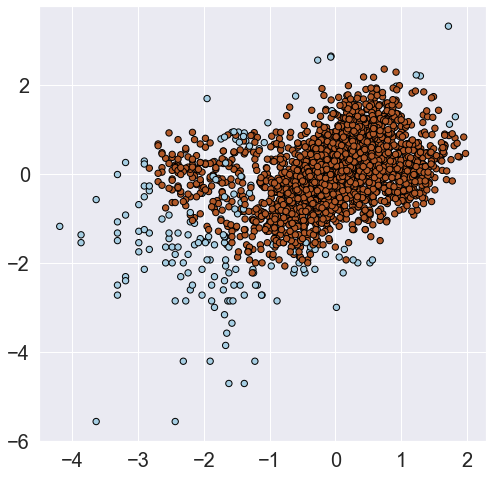

In [208]:
# visualizzazione grafica clustering scelto

plt.figure(figsize=(8, 8))

plt.scatter( df_1['gpuls_S'], df_1['gdenergy_S'], s=40, edgecolor='black', c= dbscan.labels_, cmap="Paired")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

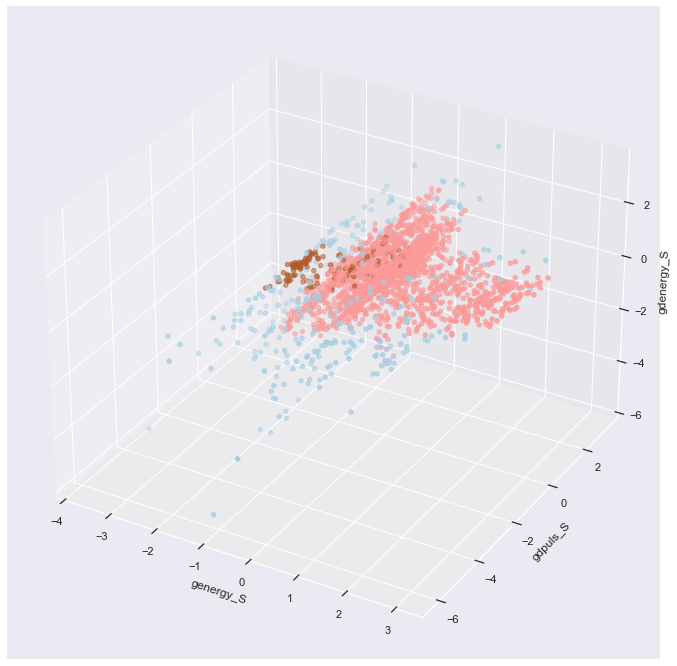

In [145]:
# visualizzazione grafica 3D clustering scelto

fig = plt.figure(figsize = (16,12))

x = 'genergy_S'
y = 'gdpuls_S'
z = "gdenergy_S"

ax = plt.axes(projection="3d")
ax.scatter(df_1[x], df_1[y], df_1[z], c=dbscan.labels_, marker='o', cmap="Paired")
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

## Hierarchical

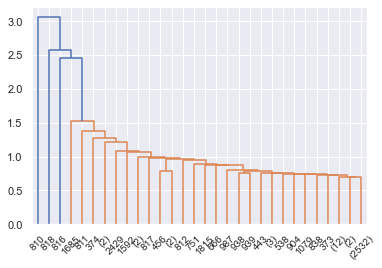

In [209]:
# Single
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='single')
res = dendrogram(data_link, truncate_mode='lastp')

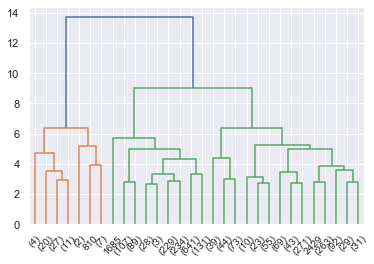

In [210]:
# Complete
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='complete')
res = dendrogram(data_link, truncate_mode='lastp')

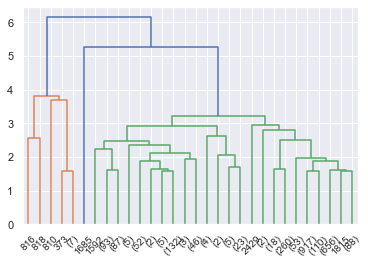

In [211]:
# Average
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='average')
res = dendrogram(data_link, truncate_mode='lastp')

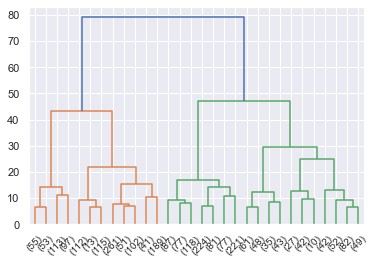

In [212]:
# ward
data_dist = pdist(df_1, metric='euclidean')
data_link = linkage(data_dist, method='ward')
res = dendrogram(data_link, truncate_mode='lastp')

In [213]:
results = []
linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
for k in range(2, 30):
    for l in linkages:
        for metr in metrics:
            if l == 'ward' and metr != 'euclidean':
                continue
            res = AgglomerativeClustering(n_clusters=k, affinity=metr, linkage=l).fit(df_1)
            results.append({'res': res, 'k': k,'silu': silhouette_score(df_1, res.labels_, metric = metr), 'link': l, 'metric': metr})
    print("end k = ", k)

end k =  2
end k =  3
end k =  4
end k =  5
end k =  6
end k =  7
end k =  8
end k =  9
end k =  10
end k =  11
end k =  12
end k =  13
end k =  14
end k =  15
end k =  16
end k =  17
end k =  18
end k =  19
end k =  20
end k =  21
end k =  22
end k =  23
end k =  24
end k =  25
end k =  26
end k =  27
end k =  28
end k =  29


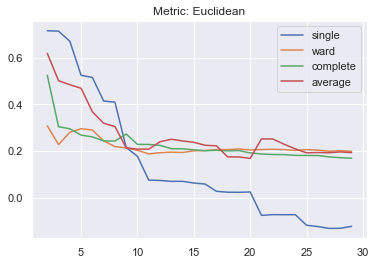

In [214]:
x = range(2, 30)
fig, ax = plt.subplots()

y1 = [a for a in results if a['link'] == 'single' and a['metric'] == 'euclidean']
y2 = [a for a in results if a['link'] == 'ward' and a['metric'] == 'euclidean']
y3 = [a for a in results if a['link'] == 'complete' and a['metric'] == 'euclidean']
y4 = [a for a in results if a['link'] == 'average' and a['metric'] == 'euclidean']

ys = [y1, y2, y3, y4]

for e in ys:
  l = e[0]['link']
  ax.plot(x, [s['silu'] for s in e], label=l)

ax.set_title('Metric: Euclidean')

ax.legend()

plt.show()